PROBLEM STATEMENT

We aim to answer:

Can horsepower be used to predict fuel economy (MPG) accurately?

We hypothesise a negative correlation — as horsepower increases, MPG decreases.

STEP 1 IMPORT LIBRARIES

In [1]:
# for data frame manipulation like a table 
import pandas as pd
# for analysis 
import numpy as np
# data visualisation 
import matplotlib.pyplot as plt
# compelling statistical data 
import seaborn as sns

In [ ]:
STEP 2 IMPORT DATASET

In [2]:
# pandas to read our data #
FuelEconomy = pd.read_csv('FuelEconomy.csv')

In [3]:
# first 10 records to view#
print(FuelEconomy.head(10))

   Horse Power  Fuel Economy (MPG)
0   118.770799           29.344195
1   176.326567           24.695934
2   219.262465           23.952010
3   187.310009           23.384546
4   218.594340           23.426739
5   175.838106           24.173571
6   271.441608           17.163583
7   294.425916           17.274218
8   126.211008           28.718210
9   163.350335           28.289516


In [4]:
# last 10 records to view
print(FuelEconomy.tail(10))

    Horse Power  Fuel Economy (MPG)
90   237.673085           19.723462
91   205.046797           25.286954
92   227.380124           24.181109
93   131.542116           29.397567
94   260.674444           17.802706
95   162.810542           27.418661
96   266.869640           15.989945
97   243.831211           19.253375
98   140.959803           29.515593
99   184.123053           25.196097


In [5]:
#view full set of records#
print(FuelEconomy)

    Horse Power  Fuel Economy (MPG)
0    118.770799           29.344195
1    176.326567           24.695934
2    219.262465           23.952010
3    187.310009           23.384546
4    218.594340           23.426739
..          ...                 ...
95   162.810542           27.418661
96   266.869640           15.989945
97   243.831211           19.253375
98   140.959803           29.515593
99   184.123053           25.196097

[100 rows x 2 columns]


In [6]:
#summary of the data
print(FuelEconomy.describe())

       Horse Power  Fuel Economy (MPG)
count   100.000000          100.000000
mean    213.676190           23.178501
std      62.061726            4.701666
min      50.000000           10.000000
25%     174.996514           20.439516
50%     218.928402           23.143192
75%     251.706476           26.089933
max     350.000000           35.000000


In [ ]:
STEP 3 VISUALIZE DATASET

In [12]:
#visualization of data
print(FuelEconomy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


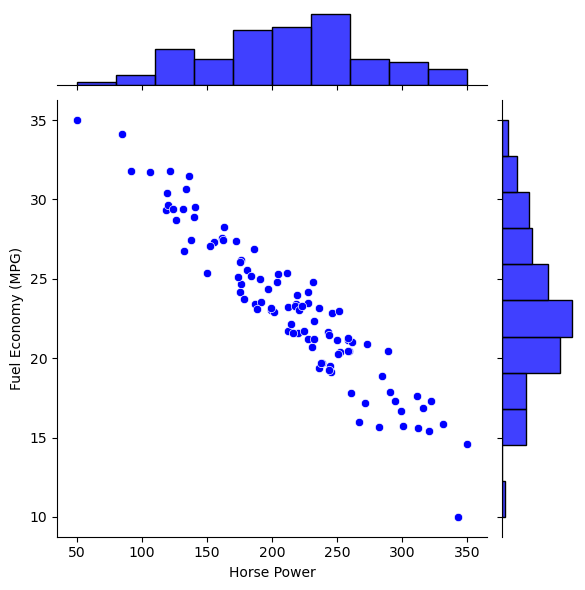

In [13]:
#visualize data set
sns.jointplot(x= 'Horse Power', y= 'Fuel Economy (MPG)',  data = FuelEconomy, color = 'blue')

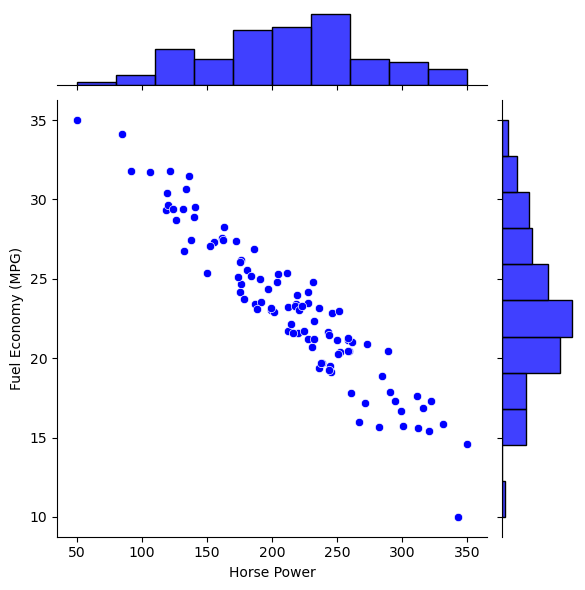

In [14]:
#visualize data set
sns.jointplot(x= 'Horse Power', y= 'Fuel Economy (MPG)',  data = FuelEconomy, color = 'blue')

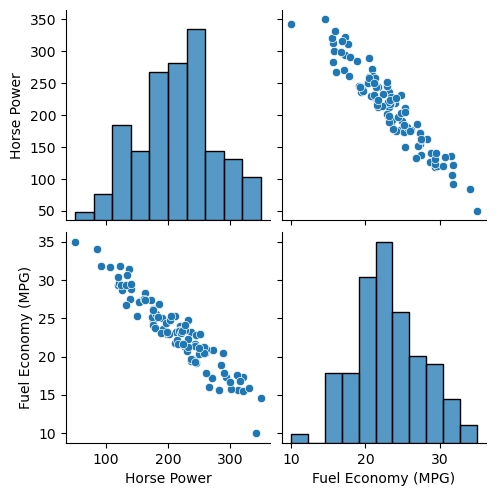

In [16]:
# we can use tons of information in pairplot instead of join plot this pair plot take care everything in one command
sns.pairplot(FuelEconomy)
plt.show()

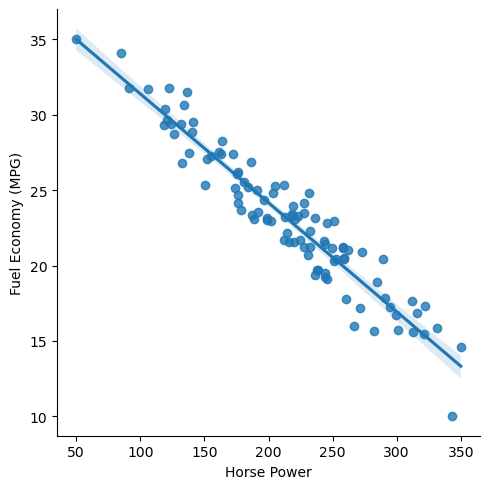

In [15]:
#quick way of plotting straight line data
sns.lmplot(x= 'Horse Power', y= 'Fuel Economy (MPG)',  data = FuelEconomy)

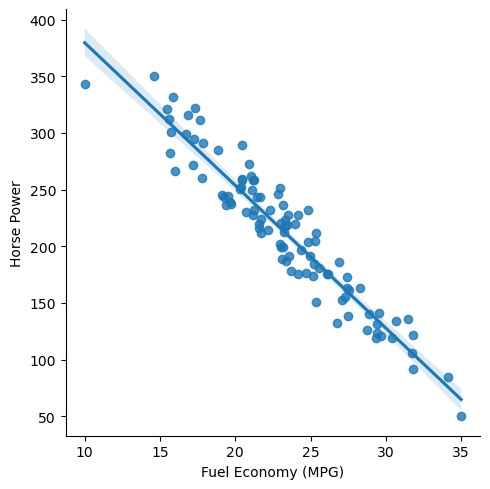

In [17]:
sns.lmplot(x= 'Fuel Economy (MPG)', y= 'Horse Power',  data = FuelEconomy)

In [ ]:
STEP 4 CREATE TESTING AND TRAINING DATASET

In [18]:
x = FuelEconomy[['Horse Power']]

In [19]:
x

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [20]:
y = FuelEconomy[['Fuel Economy (MPG)']]

In [21]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(80, 1)

In [28]:
y_train

,Fuel Economy (MPG)
55,23.011194
88,24.826199
26,21.167343
42,21.442703
69,16.831188
...,...
60,20.715722
71,16.693369
14,25.341892
92,24.181109


In [29]:
X_test

,Horse Power
83,232.216607
53,250.709289
70,223.179649
45,132.669569
44,227.670465
39,252.552386
22,122.040161
80,198.958315
10,321.840752
0,118.770799


In [30]:
y_test

,Fuel Economy (MPG)
83,21.216359
53,20.291766
70,23.307192
45,26.778148
44,21.205987
39,20.407571
22,31.796612
80,23.172223
10,17.300628
0,29.344195


In [31]:
y_test.shape

(20, 1)

In [32]:
X_train.shape

(80, 1)

In [ ]:
STEP 5 TRAIN MODEL

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(fit_intercept = True) # False then  b is 0
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
print('Linear regression coefficient m- slope', regression.coef_)
print('Linear regression coefficient b - intercept', regression.intercept_)

Linear regression coefficient m- slope [[-0.0733005]]
Linear regression coefficient b - intercept [38.87725908]


In [ ]:
STEP 6 TEST THE MODEL

In [39]:
y_predict = regression.predict(X_test)

In [40]:
y_predict

array([[21.85566531],
       [20.50014248],
       [22.51807886],
       [29.1525131 ],
       [22.18889979],
       [20.36504254],
       [29.93165405],
       [24.29351481],
       [15.28617054],
       [30.17129996],
       [29.79637526],
       [13.22208354],
       [19.68336809],
       [18.16222608],
       [21.45570273],
       [22.85418435],
       [23.15543817],
       [15.3513636 ],
       [27.48523469],
       [25.97789405]])

Text(0.5, 1.0, 'HORSE POWER VS FUEL ECONOMY')

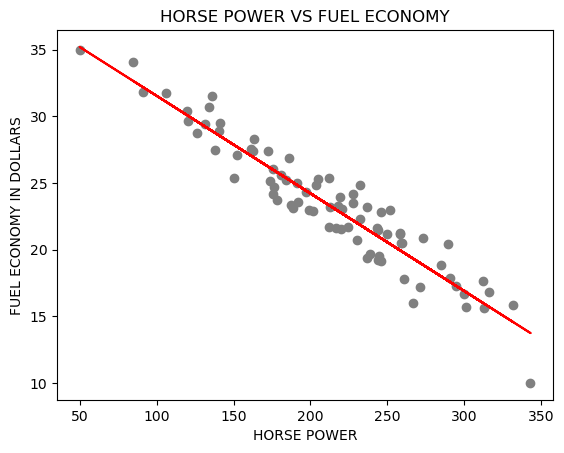

In [41]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regression.predict(X_train), color = 'red')
plt.ylabel("FUEL ECONOMY IN DOLLARS")
plt.xlabel("HORSE POWER")
plt.title("HORSE POWER VS FUEL ECONOMY")

Text(0.5, 1.0, 'HORSE POWER VS FUEL ECONOMY')

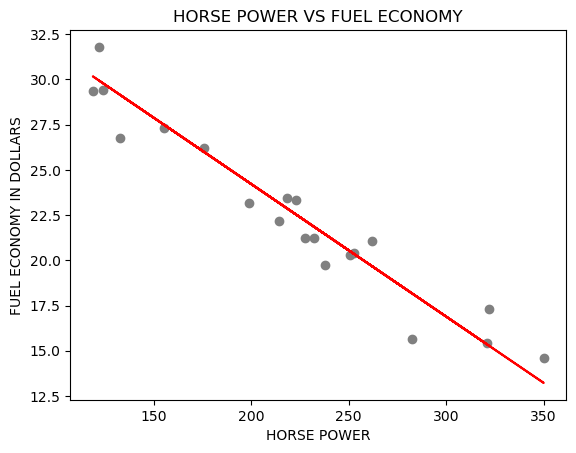

In [42]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regression.predict(X_test), color = 'red')
plt.ylabel("FUEL ECONOMY IN DOLLARS")
plt.xlabel("HORSE POWER")
plt.title("HORSE POWER VS FUEL ECONOMY")

In [46]:
T_df = pd.DataFrame({'Horse Power': [201]})
FuelEconomyValue = regression.predict(T_df)


In [45]:
FuelEconomyValue

array([[2.22700831]])